In [188]:
import keras
from sklearn.metrics import mean_squared_error

In [253]:
# Read in datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

USA_train_imputed = pd.read_csv("USA_train.csv")
USA_test_imputed = pd.read_csv("USA_test.csv")
USA_train_imputed.set_index('date', inplace=True)
USA_test_imputed.set_index('date', inplace=True)

Brazil_train_imputed = pd.read_csv("Brazil_train.csv")
Brazil_test_imputed = pd.read_csv("Brazil_test.csv")
Brazil_train_imputed.set_index('date', inplace=True)
Brazil_test_imputed.set_index('date', inplace=True)

Germany_train_imputed = pd.read_csv("Germany_train.csv")
Germany_test_imputed = pd.read_csv("Germany_test.csv")
Germany_train_imputed.set_index('date', inplace=True)
Germany_test_imputed.set_index('date', inplace=True)

Nigeria_train_imputed = pd.read_csv("Nigeria_train.csv")
Nigeria_test_imputed = pd.read_csv("Nigeria_test.csv")
Nigeria_train_imputed.set_index('date', inplace=True)
Nigeria_test_imputed.set_index('date', inplace=True)

China_train_imputed = pd.read_csv("China_train.csv")
China_test_imputed = pd.read_csv("China_test.csv")
China_train_imputed.set_index('date', inplace=True)
China_test_imputed.set_index('date', inplace=True)

Australia_train_imputed = pd.read_csv("Australia_train.csv")
Australia_test_imputed = pd.read_csv("Australia_test.csv")
Australia_train_imputed.set_index('date', inplace=True)
Australia_test_imputed.set_index('date', inplace=True)

### USA

In [232]:
import warnings
warnings.filterwarnings("ignore")

In [233]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
USA_train_imputed = USA_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
USA_train_imputed['new_cases_Lag_7'] = USA_train_imputed['new_cases_Lag_7'].fillna(0)
USA_train_imputed['new_cases_Lag_14'] = USA_train_imputed['new_cases_Lag_14'].fillna(0)
USA_train_imputed["Weekend"] = USA_train_imputed["Weekend"].astype(int)


USA_test_imputed = USA_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
USA_test_imputed['new_cases_Lag_7'][0:7] = USA_train_imputed['new_cases'][-7:]
USA_test_imputed['new_cases_Lag_14'][0:14] = USA_train_imputed['new_cases'][-14:]
USA_test_imputed["Weekend"] = USA_test_imputed["Weekend"].astype(int)

In [234]:
USA_train_target = USA_train_imputed['new_cases']
USA_test_target = USA_test_imputed['new_cases']
USA_train_imputed = USA_train_imputed.drop(columns = ['new_cases'])
USA_test_imputed = USA_test_imputed.drop(columns = ['new_cases'])

In [235]:
# NORMALIZE DATA
def normalize(df):
    for col in df.columns:
        if col != 'new_cases':
            df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

USA_train_imputed = normalize(USA_train_imputed)
USA_test_imputed = normalize(USA_test_imputed)

In [236]:
# CREATE SEQUENCES FOR TRAINING DATA
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(USA_train_imputed) - sequence_length + 1):
    sequences.append(USA_train_imputed[i:i + sequence_length])
    targets_seq.append(USA_train_target[i + sequence_length - 1])

In [237]:
sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (697, 14, 35)
Targets Shape: (697,)


In [224]:
# INITIALIZE MODEL
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(14, 35)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss="mean_squared_error")
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 32)                8704      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,737
Trainable params: 8,737
Non-trainable params: 0
_________________________________________________________________


2023-11-25 22:59:15.235661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 22:59:15.237535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 22:59:15.239174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [225]:
# FIT MODEL
model.fit(sequences, targets_seq, epochs=1000, batch_size=32, shuffle=True)

Epoch 1/1000


2023-11-25 22:59:25.213643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 22:59:25.215916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 22:59:25.217569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 6ms/step - loss: 11828551680.0000
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 11766401024.0000
Epoch 3/1000
22/22 [==============================] - 0s 6ms/step - loss: 11693644800.0000
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 11618468864.0000
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 11536485376.0000
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 11427132416.0000
Epoch 7/1000
22/22 [==============================] - 0s 6ms/step - loss: 11313436672.0000
Epoch 8/1000
22/22 [==============================] - 0s 6ms/step - loss: 11192452096.0000
Epoch 9/1000
22/22 [==============================] - 0s 6ms/step - loss: 11046970368.0000
Epoch 10/1000
22/22 [==============================] - 0s 6ms/step - loss: 10849132544.0000
Epoch 11/1000
22/22 [==============================] - 0s 6ms/step - loss: 10677454848.0000
Epoch 12/1

In [226]:
# MAKE TRAINING PREDICTIONS AND RMSE
predictions = model.predict(sequences)
for i in range (1,14):
    predictions = np.insert(predictions, 0, 0)

rmse = np.sqrt(mean_squared_error(predictions, USA_train_target))
rmse

 1/22 [>.............................] - ETA: 7s

2023-11-25 23:03:12.802014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 23:03:12.804252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 23:03:12.805776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 0s 2ms/step


30312.982733277848

<Axes: xlabel='date'>

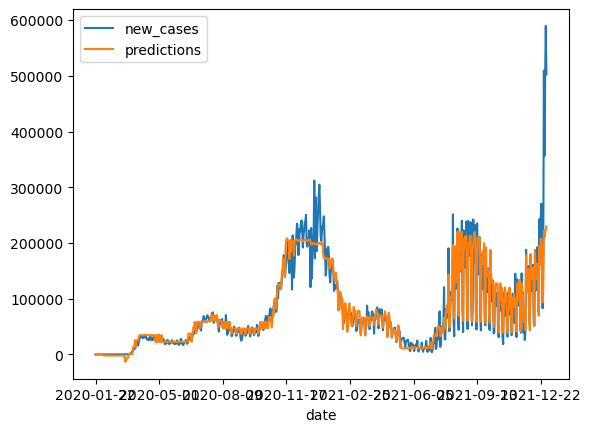

In [227]:
# MAKE TRAINING PLOT
USA_train_imputed['predictions'] = predictions
USA_train_imputed['new_cases'] = USA_train_target
USA_train_imputed.plot(y=["new_cases", "predictions"])

In [238]:
# MAKE TESTING SEQUENCES
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(USA_test_imputed) - sequence_length + 1):
    sequences.append(USA_test_imputed[i:i + sequence_length])
    targets_seq.append(USA_test_target[i + sequence_length - 1])

sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (51, 14, 35)
Targets Shape: (51,)


In [239]:
# MAKE TESTING PREDICTIONS AND RMSE
predictions = model.predict(sequences)

rmse = np.sqrt(mean_squared_error(predictions, USA_test_target[13:]))
rmse

2/2 [==============================] - 0s 3ms/step


300377.519460761

<Axes: xlabel='date'>

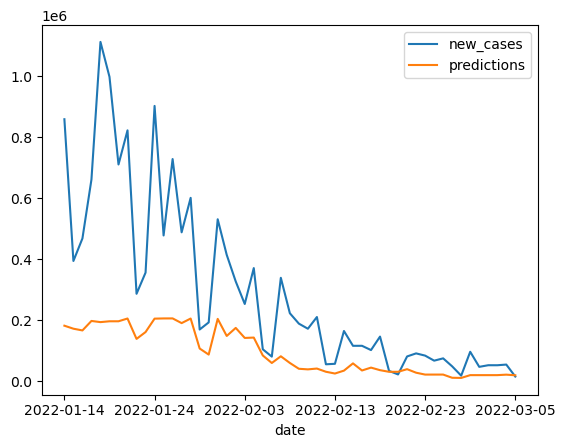

In [240]:
# MAKE TESTING PLOT
USA_test_imputed = USA_test_imputed.drop(USA_test_imputed.index[:13])
USA_test_imputed['predictions'] = predictions
USA_test_imputed['new_cases'] = USA_test_target
USA_test_imputed.plot(y=["new_cases", "predictions"])

### BRAZIL

In [254]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Brazil_train_imputed = Brazil_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Brazil_train_imputed['new_cases_Lag_7'] = Brazil_train_imputed['new_cases_Lag_7'].fillna(0)
Brazil_train_imputed['new_cases_Lag_14'] = Brazil_train_imputed['new_cases_Lag_14'].fillna(0)
Brazil_train_imputed["Weekend"] = Brazil_train_imputed["Weekend"].astype(int)


Brazil_test_imputed = Brazil_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Brazil_test_imputed['new_cases_Lag_7'][0:7] = Brazil_train_imputed['new_cases'][-7:]
Brazil_test_imputed['new_cases_Lag_14'][0:14] = Brazil_train_imputed['new_cases'][-14:]
Brazil_test_imputed["Weekend"] = Brazil_test_imputed["Weekend"].astype(int)


In [255]:
Brazil_train_target = Brazil_train_imputed['new_cases']
Brazil_test_target = Brazil_test_imputed['new_cases']
Brazil_train_imputed = Brazil_train_imputed.drop(columns=['new_cases'])
Brazil_test_imputed = Brazil_test_imputed.drop(columns=['new_cases'])

In [256]:
def normalize(df):
    for col in df.columns:
        if col != 'new_cases':
            df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

Brazil_train_imputed = normalize(Brazil_train_imputed)
Brazil_test_imputed = normalize(Brazil_test_imputed)


In [257]:
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(Brazil_train_imputed) - sequence_length + 1):
    sequences.append(Brazil_train_imputed[i:i + sequence_length])
    targets_seq.append(Brazil_train_target[i + sequence_length - 1])

In [258]:
sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (662, 14, 23)
Targets Shape: (662,)


In [259]:
# INITIALIZE MODEL
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(14, 23)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss="mean_squared_error")
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 32)                7168      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,201
Trainable params: 7,201
Non-trainable params: 0
_________________________________________________________________


2023-11-25 23:47:56.199984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 23:47:56.201777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 23:47:56.202865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [260]:
# FIT MODEL
model.fit(sequences, targets_seq, epochs=1000, batch_size=32, shuffle=True)

Epoch 1/1000


2023-11-25 23:47:58.829924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 23:47:58.831329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 23:47:58.833455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 6ms/step - loss: 1716002688.0000
Epoch 2/1000
21/21 [==============================] - 0s 7ms/step - loss: 1678860288.0000
Epoch 3/1000
21/21 [==============================] - 0s 6ms/step - loss: 1633077248.0000
Epoch 4/1000
21/21 [==============================] - 0s 6ms/step - loss: 1582531200.0000
Epoch 5/1000
21/21 [==============================] - 0s 6ms/step - loss: 1533580672.0000
Epoch 6/1000
21/21 [==============================] - 0s 6ms/step - loss: 1486541952.0000
Epoch 7/1000
21/21 [==============================] - 0s 7ms/step - loss: 1442592640.0000
Epoch 8/1000
21/21 [==============================] - 0s 6ms/step - loss: 1398529024.0000
Epoch 9/1000
21/21 [==============================] - 0s 6ms/step - loss: 1387164416.0000
Epoch 10/1000
21/21 [==============================] - 0s 6ms/step - loss: 1348517376.0000
Epoch 11/1000
21/21 [==============================] - 0s 6ms/step - loss: 1297370368.0000
Epoch 12/1000
21/21 [

In [261]:
# MAKE TRAINING PREDICTIONS AND RMSE
predictions = model.predict(sequences)
for i in range (1,14):
    predictions = np.insert(predictions, 0, 0)

rmse = np.sqrt(mean_squared_error(predictions, Brazil_train_target))
rmse

21/21 [==============================] - 0s 2ms/step


2023-11-25 23:52:10.659123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 23:52:10.660980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 23:52:10.662511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9461.852986430287

<Axes: xlabel='date'>

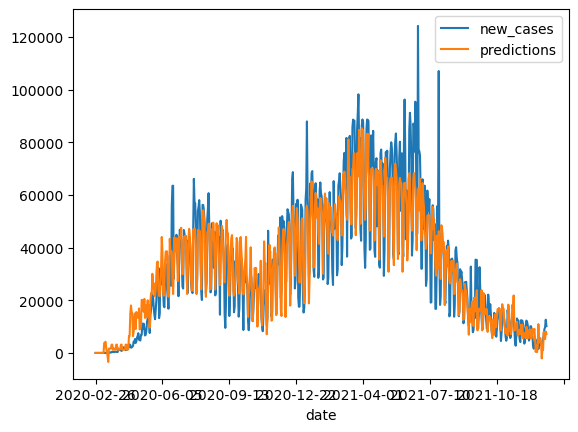

In [263]:
# TRAINING PLOT
Brazil_train_imputed['predictions'] = predictions
Brazil_train_imputed['new_cases'] = Brazil_train_target
Brazil_train_imputed.plot(y=["new_cases", "predictions"])


In [264]:
# MAKE TESTING SEQUENCES
sequence_length = 14
sequences_brazil = []
targets_seq_brazil = []

for i in range(len(Brazil_test_imputed) - sequence_length + 1):
    sequences_brazil.append(Brazil_test_imputed[i:i + sequence_length])
    targets_seq_brazil.append(Brazil_test_target[i + sequence_length - 1])

sequences_brazil = np.array(sequences_brazil)
targets_seq_brazil = np.array(targets_seq_brazil)
print("Sequences Shape (Brazil):", sequences_brazil.shape)
print("Targets Shape (Brazil):", targets_seq_brazil.shape)

Sequences Shape (Brazil): (51, 14, 23)
Targets Shape (Brazil): (51,)


In [265]:
# MAKE TESTING PREDICTIONS AND RMSE
predictions = model.predict(sequences_brazil)

rmse = np.sqrt(mean_squared_error(predictions, Brazil_test_target[13:]))
rmse

2/2 [==============================] - 0s 3ms/step


101162.37780167922

<Axes: xlabel='date'>

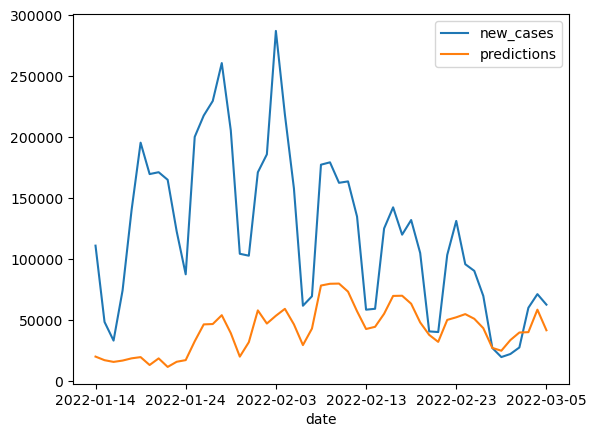

In [266]:
# TEST PLOT
Brazil_test_imputed = Brazil_test_imputed.drop(Brazil_test_imputed.index[:13])
Brazil_test_imputed['predictions'] = predictions
Brazil_test_imputed['new_cases'] = Brazil_test_target
Brazil_test_imputed.plot(y=["new_cases", "predictions"])


### GERMANY

In [267]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Germany_train_imputed = Germany_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Germany_train_imputed['new_cases_Lag_7'] = Germany_train_imputed['new_cases_Lag_7'].fillna(0)
Germany_train_imputed['new_cases_Lag_14'] = Germany_train_imputed['new_cases_Lag_14'].fillna(0)
Germany_train_imputed["Weekend"] = Germany_train_imputed["Weekend"].astype(int)


Germany_test_imputed = Germany_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Germany_test_imputed['new_cases_Lag_7'][0:7] = Germany_train_imputed['new_cases'][-7:]
Germany_test_imputed['new_cases_Lag_14'][0:14] = Germany_train_imputed['new_cases'][-14:]
Germany_test_imputed["Weekend"] = Germany_test_imputed["Weekend"].astype(int)


In [268]:
Germany_train_target = Germany_train_imputed['new_cases']
Germany_test_target = Germany_test_imputed['new_cases']
Germany_train_imputed = Germany_train_imputed.drop(columns=['new_cases'])
Germany_test_imputed = Germany_test_imputed.drop(columns=['new_cases'])

In [269]:
def normalize(df):
    for col in df.columns:
        if col != 'new_cases':
            df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

Germany_train_imputed = normalize(Germany_train_imputed)
Germany_test_imputed = normalize(Germany_test_imputed)


In [270]:
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(Germany_train_imputed) - sequence_length + 1):
    sequences.append(Germany_train_imputed[i:i + sequence_length])
    targets_seq.append(Germany_train_target[i + sequence_length - 1])

In [271]:
sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (692, 14, 29)
Targets Shape: (692,)


In [272]:
# INITIALIZE MODEL
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(14, 29)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss="mean_squared_error")
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 32)                7936      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,969
Trainable params: 7,969
Non-trainable params: 0
_________________________________________________________________


2023-11-25 23:56:03.350613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 23:56:03.352630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 23:56:03.354082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [273]:
# FIT MODEL
model.fit(sequences, targets_seq, epochs=1000, batch_size=32, shuffle=True)

Epoch 1/1000


2023-11-25 23:56:07.972991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-25 23:56:07.975002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-25 23:56:07.976372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 5ms/step - loss: 317519168.0000
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 309263424.0000
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 298571904.0000
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 287775264.0000
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 277708192.0000
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 267285920.0000
Epoch 7/1000
22/22 [==============================] - 0s 5ms/step - loss: 257825088.0000
Epoch 8/1000
22/22 [==============================] - 0s 5ms/step - loss: 249948224.0000
Epoch 9/1000
22/22 [==============================] - 0s 5ms/step - loss: 242968048.0000
Epoch 10/1000
22/22 [==============================] - 0s 5ms/step - loss: 235039728.0000
Epoch 11/1000
22/22 [==============================] - 0s 7ms/step - loss: 227432560.0000
Epoch 12/1000
22/22 [===========

In [274]:
# MAKE TRAINING PREDICTIONS AND RMSE
predictions = model.predict(sequences)
for i in range (1,14):
    predictions = np.insert(predictions, 0, 0)

rmse = np.sqrt(mean_squared_error(predictions, Germany_train_target))
rmse

 1/22 [>.............................] - ETA: 16s

2023-11-26 00:00:11.926539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:00:11.928236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:00:11.929839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 2ms/step


6190.462704347338

<Axes: xlabel='date'>

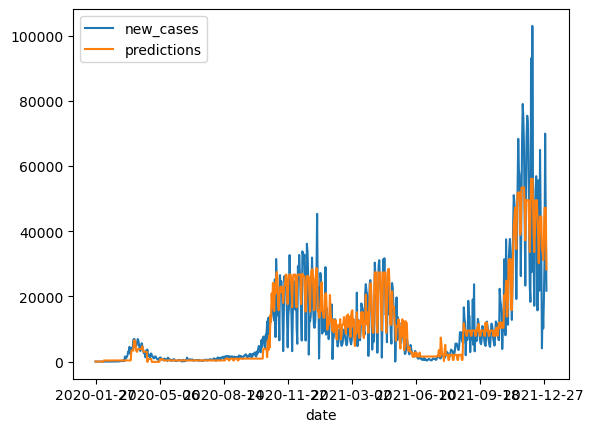

In [275]:
# TRAINING PLOT
Germany_train_imputed['predictions'] = predictions
Germany_train_imputed['new_cases'] = Germany_train_target
Germany_train_imputed.plot(y=["new_cases", "predictions"])


In [276]:
# MAKE TESTING SEQUENCES
sequence_length = 14
sequences_Germany = []
targets_seq_Germany = []

for i in range(len(Germany_test_imputed) - sequence_length + 1):
    sequences_Germany.append(Germany_test_imputed[i:i + sequence_length])
    targets_seq_Germany.append(Germany_test_target[i + sequence_length - 1])

sequences_Germany = np.array(sequences_Germany)
targets_seq_Germany = np.array(targets_seq_Germany)
print("Sequences Shape (Germany):", sequences_brazil.shape)
print("Targets Shape (Germany):", targets_seq_brazil.shape)

Sequences Shape (Germany): (51, 14, 23)
Targets Shape (Germany): (51,)


In [277]:
# MAKE TESTING PREDICTIONS AND RMSE
predictions = model.predict(sequences_Germany)

rmse = np.sqrt(mean_squared_error(predictions, Germany_test_target[13:]))
rmse

2/2 [==============================] - 0s 3ms/step


150551.9471005123

<Axes: xlabel='date'>

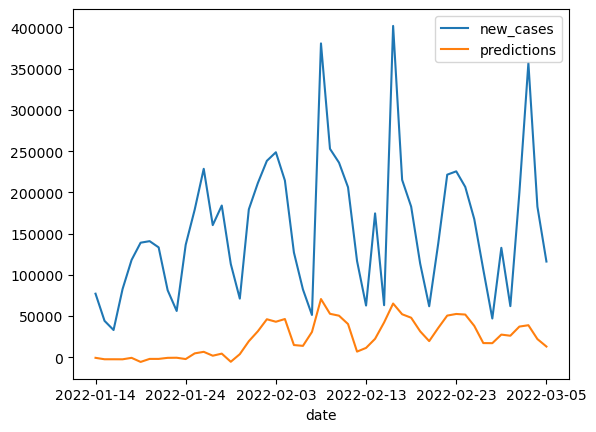

In [279]:
# TEST PLOT
Germany_test_imputed = Germany_test_imputed.drop(Germany_test_imputed.index[:13])
Germany_test_imputed['predictions'] = predictions
Germany_test_imputed['new_cases'] = Germany_test_target
Germany_test_imputed.plot(y=["new_cases", "predictions"])

### NIGERIA

In [280]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Nigeria_train_imputed = Nigeria_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Nigeria_train_imputed['new_cases_Lag_7'] = Nigeria_train_imputed['new_cases_Lag_7'].fillna(0)
Nigeria_train_imputed['new_cases_Lag_14'] = Nigeria_train_imputed['new_cases_Lag_14'].fillna(0)
Nigeria_train_imputed["Weekend"] = Nigeria_train_imputed["Weekend"].astype(int)


Nigeria_test_imputed = Nigeria_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita',
                                                                              'cardiovasc_death_rate',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Nigeria_test_imputed['new_cases_Lag_7'][0:7] = Nigeria_train_imputed['new_cases'][-7:]
Nigeria_test_imputed['new_cases_Lag_14'][0:14] = Nigeria_train_imputed['new_cases'][-14:]
Nigeria_test_imputed["Weekend"] = Nigeria_test_imputed["Weekend"].astype(int)

In [281]:
Nigeria_train_target = Nigeria_train_imputed['new_cases']
Nigeria_test_target = Nigeria_test_imputed['new_cases']
Nigeria_train_imputed = Nigeria_train_imputed.drop(columns=['new_cases'])
Nigeria_test_imputed = Nigeria_test_imputed.drop(columns=['new_cases'])

In [282]:
def normalize(df):
    for col in df.columns:
        if col != 'new_cases':
            df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

Nigeria_train_imputed = normalize(Nigeria_train_imputed)
Nigeria_test_imputed = normalize(Nigeria_test_imputed)


In [283]:
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(Nigeria_train_imputed) - sequence_length + 1):
    sequences.append(Nigeria_train_imputed[i:i + sequence_length])
    targets_seq.append(Nigeria_train_target[i + sequence_length - 1])

In [284]:
sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (660, 14, 19)
Targets Shape: (660,)


In [285]:
# INITIALIZE MODEL
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(14, 19)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss="mean_squared_error")
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 32)                6656      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,689
Trainable params: 6,689
Non-trainable params: 0
_________________________________________________________________


2023-11-26 00:01:19.448759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:01:19.451430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:01:19.452837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [286]:
# FIT MODEL
model.fit(sequences, targets_seq, epochs=1000, batch_size=32, shuffle=True)

Epoch 1/1000


2023-11-26 00:01:35.229499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:01:35.232366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:01:35.234467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 5ms/step - loss: 279559.2500
Epoch 2/1000
21/21 [==============================] - 0s 6ms/step - loss: 181635.3281
Epoch 3/1000
21/21 [==============================] - 0s 6ms/step - loss: 149581.1094
Epoch 4/1000
21/21 [==============================] - 0s 6ms/step - loss: 138340.3594
Epoch 5/1000
21/21 [==============================] - 0s 6ms/step - loss: 128762.5547
Epoch 6/1000
21/21 [==============================] - 0s 6ms/step - loss: 123546.9219
Epoch 7/1000
21/21 [==============================] - 0s 6ms/step - loss: 125091.1875
Epoch 8/1000
21/21 [==============================] - 0s 6ms/step - loss: 119819.8906
Epoch 9/1000
21/21 [==============================] - 0s 6ms/step - loss: 125215.4062
Epoch 10/1000
21/21 [==============================] - 0s 6ms/step - loss: 118497.1875
Epoch 11/1000
21/21 [==============================] - 0s 6ms/step - loss: 118195.2266
Epoch 12/1000
21/21 [==============================] - 0s 7ms/ste

In [287]:
# MAKE TRAINING PREDICTIONS AND RMSE
predictions = model.predict(sequences)
for i in range (1,14):
    predictions = np.insert(predictions, 0, 0)

rmse = np.sqrt(mean_squared_error(predictions, Nigeria_train_target))
rmse

21/21 [==============================] - 0s 2ms/step


2023-11-26 00:06:00.144133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:06:00.145768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:06:00.147002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

280.6260274181172

<Axes: xlabel='date'>

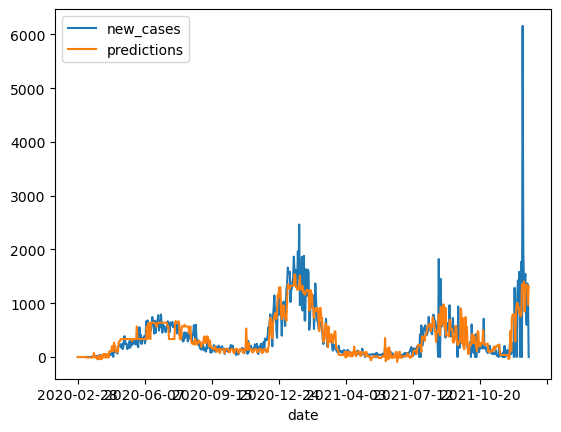

In [288]:
# TRAINING PLOT
Nigeria_train_imputed['predictions'] = predictions
Nigeria_train_imputed['new_cases'] = Nigeria_train_target
Nigeria_train_imputed.plot(y=["new_cases", "predictions"])


In [289]:
# MAKE TESTING SEQUENCES
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(Nigeria_test_imputed) - sequence_length + 1):
    sequences.append(Nigeria_test_imputed[i:i + sequence_length])
    targets_seq.append(Nigeria_test_target[i + sequence_length - 1])

sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (51, 14, 19)
Targets Shape: (51,)


In [290]:
# MAKE TESTING PREDICTIONS AND RMSE
predictions = model.predict(sequences)

rmse = np.sqrt(mean_squared_error(predictions, Nigeria_test_target[13:]))
rmse

2/2 [==============================] - 0s 3ms/step


281.2401714702626

<Axes: xlabel='date'>

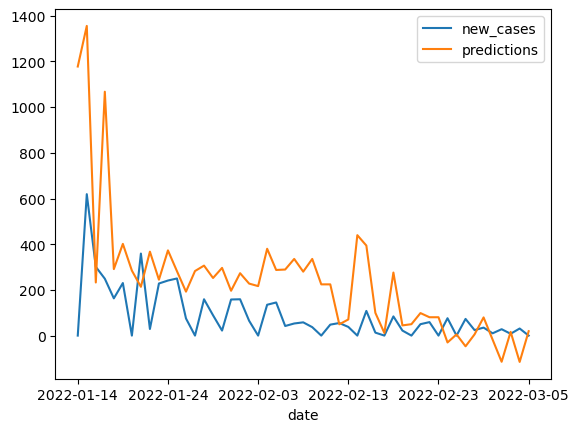

In [291]:
# MAKE TESTING PLOT
Nigeria_test_imputed = Nigeria_test_imputed.drop(Nigeria_test_imputed.index[:13])
Nigeria_test_imputed['predictions'] = predictions
Nigeria_test_imputed['new_cases'] = Nigeria_test_target
Nigeria_test_imputed.plot(y=["new_cases", "predictions"])

### CHINA

In [292]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
China_train_imputed = China_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
China_train_imputed['new_cases_Lag_7'] = China_train_imputed['new_cases_Lag_7'].fillna(0)
China_train_imputed['new_cases_Lag_14'] = China_train_imputed['new_cases_Lag_14'].fillna(0)
China_train_imputed["Weekend"] = China_train_imputed["Weekend"].astype(int)


China_test_imputed = China_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
China_test_imputed['new_cases_Lag_7'][0:7] = China_train_imputed['new_cases'][-7:]
China_test_imputed['new_cases_Lag_14'][0:14] = China_train_imputed['new_cases'][-14:]
China_test_imputed["Weekend"] = China_test_imputed["Weekend"].astype(int)

In [293]:
China_train_target = China_train_imputed['new_cases']
China_test_target = China_test_imputed['new_cases']
China_train_imputed = China_train_imputed.drop(columns=['new_cases'])
China_test_imputed = China_test_imputed.drop(columns=['new_cases'])

In [294]:
def normalize(df):
    for col in df.columns:
        if col != 'new_cases':
            df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

China_train_imputed = normalize(China_train_imputed)
China_test_imputed = normalize(China_test_imputed)


In [295]:
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(China_train_imputed) - sequence_length + 1):
    sequences.append(China_train_imputed[i:i + sequence_length])
    targets_seq.append(China_train_target[i + sequence_length - 1])


In [296]:
sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (697, 14, 15)
Targets Shape: (697,)


In [297]:
# INITIALIZE MODEL
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(14, 15)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss="mean_squared_error")
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 32)                6144      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,177
Trainable params: 6,177
Non-trainable params: 0
_________________________________________________________________


2023-11-26 00:06:30.237491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:06:30.239901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:06:30.241666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [298]:
# FIT MODEL
model.fit(sequences, targets_seq, epochs=1000, batch_size=32, shuffle=True)

Epoch 1/1000


2023-11-26 00:06:38.845736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:06:38.846947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:06:38.848354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 5ms/step - loss: 518581.4375
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 499041.4375
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 474836.0312
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 461590.4062
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 448868.1875
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 449041.7812
Epoch 7/1000
22/22 [==============================] - 0s 7ms/step - loss: 442685.1562
Epoch 8/1000
22/22 [==============================] - 0s 7ms/step - loss: 437526.1875
Epoch 9/1000
22/22 [==============================] - 0s 10ms/step - loss: 424597.2188
Epoch 10/1000
22/22 [==============================] - 0s 6ms/step - loss: 410075.2188
Epoch 11/1000
22/22 [==============================] - 0s 7ms/step - loss: 405062.9688
Epoch 12/1000
22/22 [==============================] - 0s 6ms/st

In [299]:
# MAKE TRAINING PREDICTIONS AND RMSE
predictions = model.predict(sequences)
for i in range (1,14):
    predictions = np.insert(predictions, 0, 0)

rmse = np.sqrt(mean_squared_error(predictions, China_train_target))
rmse

22/22 [==============================] - 0s 2ms/step


2023-11-26 00:12:14.844869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:12:14.847331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:12:14.849464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

634.4093221905476

<Axes: xlabel='date'>

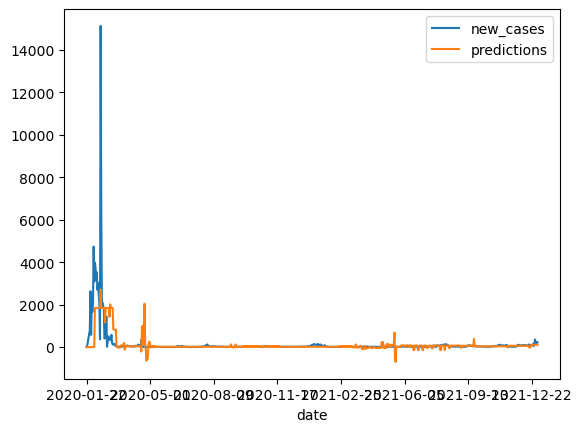

In [301]:
# TRAINING PLOT
China_train_imputed['predictions'] = predictions
China_train_imputed['new_cases'] = China_train_target
China_train_imputed.plot(y=["new_cases", "predictions"])


In [302]:
# MAKE TESTING SEQUENCES
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(China_test_imputed) - sequence_length + 1):
    sequences.append(China_test_imputed[i:i + sequence_length])
    targets_seq.append(China_test_target[i + sequence_length - 1])

sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (51, 14, 15)
Targets Shape: (51,)


In [303]:
# MAKE TESTING PREDICTIONS AND RMSE
predictions = model.predict(sequences)

rmse = np.sqrt(mean_squared_error(predictions, China_test_target[13:]))
rmse

2/2 [==============================] - 0s 3ms/step


754.8941678291562

<Axes: xlabel='date'>

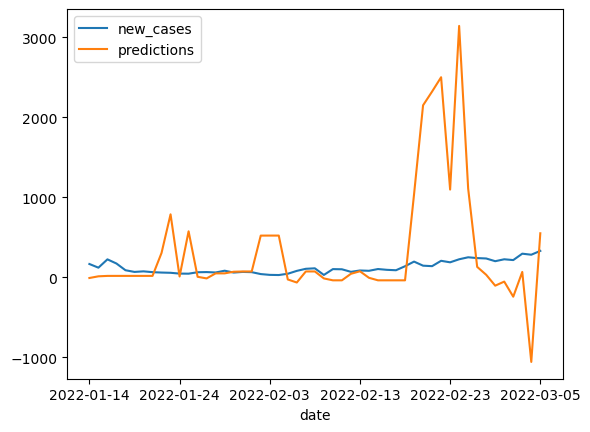

In [304]:
# MAKE TESTING PLOT
China_test_imputed = China_test_imputed.drop(China_test_imputed.index[:13])
China_test_imputed['predictions'] = predictions
China_test_imputed['new_cases'] = China_test_target
China_test_imputed.plot(y=["new_cases", "predictions"])

### AUSTRALIA

In [305]:
# Drop Columns that are constant for all dates as they will have no effect on data
# Fix Lag Columns so values at beginning ar 0 not NaN and values in test dataset are those of last values in train
Australia_train_imputed = Australia_train_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                             'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Australia_train_imputed['new_cases_Lag_7'] = Australia_train_imputed['new_cases_Lag_7'].fillna(0)
Australia_train_imputed['new_cases_Lag_14'] = Australia_train_imputed['new_cases_Lag_14'].fillna(0)
Australia_train_imputed["Weekend"] = Australia_train_imputed["Weekend"].astype(int)


Australia_test_imputed = Australia_test_imputed.drop(columns=['iso_code', 'population_density'
                                                                             ,'median_age', 'aged_65_older', 'aged_70_older',
                                                                             'gdp_per_capita','extreme_poverty',
                                                                              'cardiovasc_death_rate','hospital_beds_per_thousand',
                                                                             'life_expectancy','human_development_index','total_cases',
                                                                             'location', 'continent', 'population', 'reproduction_rate', 'new_cases_smoothed',
                                                                           'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'Rolling_Mean_new_cases'])
Australia_test_imputed['new_cases_Lag_7'][0:7] = Australia_train_imputed['new_cases'][-7:]
Australia_test_imputed['new_cases_Lag_14'][0:14] = Australia_train_imputed['new_cases'][-14:]
Australia_test_imputed["Weekend"] = Australia_test_imputed["Weekend"].astype(int)

In [306]:
Australia_train_target = Australia_train_imputed['new_cases']
Australia_test_target = Australia_test_imputed['new_cases']
Australia_train_imputed = Australia_train_imputed.drop(columns=['new_cases'])
Australia_test_imputed = Australia_test_imputed.drop(columns=['new_cases'])

In [307]:
def normalize(df):
    for col in df.columns:
        if col != 'new_cases':
            df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

Australia_train_imputed = normalize(Australia_train_imputed)
Australia_test_imputed = normalize(Australia_test_imputed)


In [308]:
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(Australia_train_imputed) - sequence_length + 1):
    sequences.append(Australia_train_imputed[i:i + sequence_length])
    targets_seq.append(Australia_train_target[i + sequence_length - 1])

In [309]:
sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (693, 14, 33)
Targets Shape: (693,)


In [310]:
# INITIALIZE MODEL
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(14, 33)))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1), loss="mean_squared_error")
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 32)                8448      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


2023-11-26 00:13:10.433449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:13:10.435152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:13:10.436370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [311]:
# FIT MODEL
model.fit(sequences, targets_seq, epochs=1000, batch_size=32, shuffle=True)

Epoch 1/1000


2023-11-26 00:13:13.695069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:13:13.696717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:13:13.697968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

22/22 [==============================] - 1s 5ms/step - loss: 5362679.0000
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 4957017.0000
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 4694192.5000
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 4493400.5000
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 4322213.5000
Epoch 6/1000
22/22 [==============================] - 0s 6ms/step - loss: 4238891.5000
Epoch 7/1000
22/22 [==============================] - 0s 6ms/step - loss: 4226181.0000
Epoch 8/1000
22/22 [==============================] - 0s 6ms/step - loss: 4128708.5000
Epoch 9/1000
22/22 [==============================] - 0s 6ms/step - loss: 4190190.7500
Epoch 10/1000
22/22 [==============================] - 0s 6ms/step - loss: 4168227.5000
Epoch 11/1000
22/22 [==============================] - 0s 6ms/step - loss: 4086066.5000
Epoch 12/1000
22/22 [==============================] -

In [312]:
# MAKE TRAINING PREDICTIONS AND RMSE
predictions = model.predict(sequences)
for i in range (1,14):
    predictions = np.insert(predictions, 0, 0)

rmse = np.sqrt(mean_squared_error(predictions, Australia_train_target))
rmse

22/22 [==============================] - 0s 2ms/step


2023-11-26 00:20:23.251647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-26 00:20:23.253019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-26 00:20:23.255348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

818.6035375757456

<Axes: xlabel='date'>

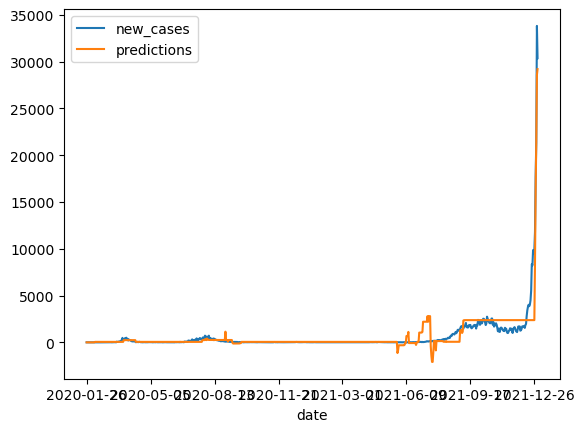

In [314]:
# TRAINING PLOT
Australia_train_imputed['predictions'] = predictions
Australia_train_imputed['new_cases'] = Australia_train_target
Australia_train_imputed.plot(y=["new_cases", "predictions"])

In [315]:
# MAKE TESTING SEQUENCES
sequence_length = 14
sequences = []
targets_seq = []

for i in range(len(Australia_test_imputed) - sequence_length + 1):
    sequences.append(Australia_test_imputed[i:i + sequence_length])
    targets_seq.append(Australia_test_target[i + sequence_length - 1])

sequences = np.array(sequences)
targets_seq = np.array(targets_seq)
print("Sequences Shape:", sequences.shape)
print("Targets Shape:", targets_seq.shape)

Sequences Shape: (51, 14, 33)
Targets Shape: (51,)


In [316]:
# MAKE TESTING PREDICTIONS AND RMSE
predictions = model.predict(sequences)

rmse = np.sqrt(mean_squared_error(predictions, Australia_test_target[13:]))
rmse

2/2 [==============================] - 0s 3ms/step


41690.663585537346

<Axes: xlabel='date'>

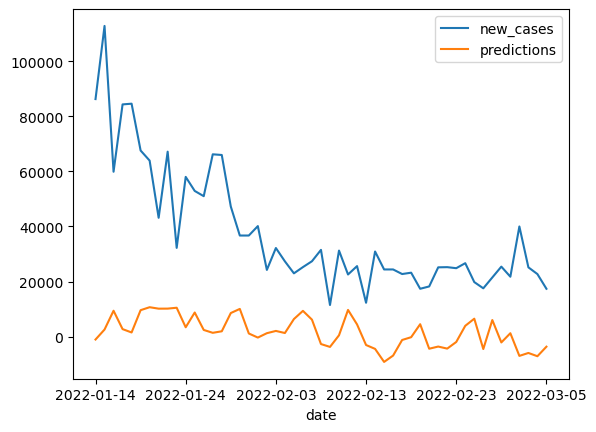

In [317]:
# MAKE TESTING PLOT
Australia_test_imputed = Australia_test_imputed.drop(Australia_test_imputed.index[:13])
Australia_test_imputed['predictions'] = predictions
Australia_test_imputed['new_cases'] = Australia_test_target
Australia_test_imputed.plot(y=["new_cases", "predictions"])